Preprocess data and training model

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv(r'C:\Users\pieta\OneDrive\Bureau\Mental Health Model\Mental_health_model\Data\Impact_of_Remote_Work_on_Mental_Health_cleaned.csv')

In [3]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
labelencoder = LabelEncoder()

# Function to label-encode categorical columns and save encoders
def label_encode_and_save(data, save_path="encoders.pkl"):
    encoders = {}  # Dictionary to save encoders for each column
    for col in data.columns:
        if data[col].dtype == 'object':  # Encode only categorical columns
            encoder = LabelEncoder()
            data[col] = encoder.fit_transform(data[col])
            encoders[col] = encoder  # Save the encoder for this column

    # Save all encoders to a .pkl file
    with open(save_path, 'wb') as f:
        pickle.dump(encoders, f)
    
    return data

# Apply the label encoding and save the encoders
data = label_encode_and_save(data)


In [4]:
#scale the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,-1.731704,-0.796378,0.459676,-0.509471,-0.012413,-0.480088,-1.235337,0.622767,-0.120587,-0.697830,1.224945,1.416539,-0.97902,-1.195793,-1.429785,1.219197,-1.435264,0.691044,-0.014006,-0.284345
1,-1.731012,-0.088093,-1.324781,-1.510988,0.492200,-1.478151,1.203631,1.044388,-0.767744,-1.406862,1.224945,-1.398523,-0.97902,0.014524,0.004446,-0.007113,-0.720420,0.691044,-0.014006,-0.866304
2,-1.730319,1.594083,0.459676,1.493561,-1.021640,0.418168,-1.235337,0.538443,0.742290,1.429268,1.224945,-1.398523,-0.97902,1.224841,0.721562,1.219197,1.424112,0.691044,1.214612,0.297614
3,-1.729626,-1.239056,-0.432552,1.493561,-0.517027,0.218556,-0.015853,-0.642094,0.095132,0.720235,-1.216644,1.416539,1.02143,0.014524,0.004446,1.219197,-0.005576,0.691044,1.214612,-0.284345
4,-1.728933,0.708727,-0.432552,0.992803,-1.526254,1.416231,-0.015853,-0.389122,0.958009,-0.697830,-1.216644,0.009008,1.02143,-1.195793,0.004446,1.219197,-0.005576,0.691044,-1.242624,0.297614


In [5]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop('Mental_Health_Condition', axis=1)
y = data['Mental_Health_Condition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Predict on test set
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[model_name] = acc
    print(f"{model_name}: Accuracy = {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression: Accuracy = 0.4790
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.48      1.00      0.65       479
           2       0.00      0.00      0.00       252

    accuracy                           0.48      1000
   macro avg       0.16      0.33      0.22      1000
weighted avg       0.23      0.48      0.31      1000



C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

KNN: Accuracy = 0.3660
              precision    recall  f1-score   support

           0       0.22      0.22      0.22       269
           1       0.46      0.60      0.52       479
           2       0.18      0.07      0.10       252

    accuracy                           0.37      1000
   macro avg       0.29      0.30      0.28      1000
weighted avg       0.32      0.37      0.33      1000

SVM: Accuracy = 0.4790
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.48      1.00      0.65       479
           2       0.00      0.00      0.00       252

    accuracy                           0.48      1000
   macro avg       0.16      0.33      0.22      1000
weighted avg       0.23      0.48      0.31      1000



C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Random Forest: Accuracy = 0.4530
              precision    recall  f1-score   support

           0       0.15      0.01      0.03       269
           1       0.47      0.93      0.63       479
           2       0.08      0.01      0.01       252

    accuracy                           0.45      1000
   macro avg       0.23      0.32      0.22      1000
weighted avg       0.29      0.45      0.31      1000

Naive Bayes: Accuracy = 0.4790
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.48      1.00      0.65       479
           2       0.00      0.00      0.00       252

    accuracy                           0.48      1000
   macro avg       0.16      0.33      0.22      1000
weighted avg       0.23      0.48      0.31      1000



C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Neural Network: Accuracy = 0.3730
              precision    recall  f1-score   support

           0       0.21      0.17      0.19       269
           1       0.48      0.54      0.51       479
           2       0.28      0.27      0.27       252

    accuracy                           0.37      1000
   macro avg       0.32      0.33      0.32      1000
weighted avg       0.36      0.37      0.36      1000



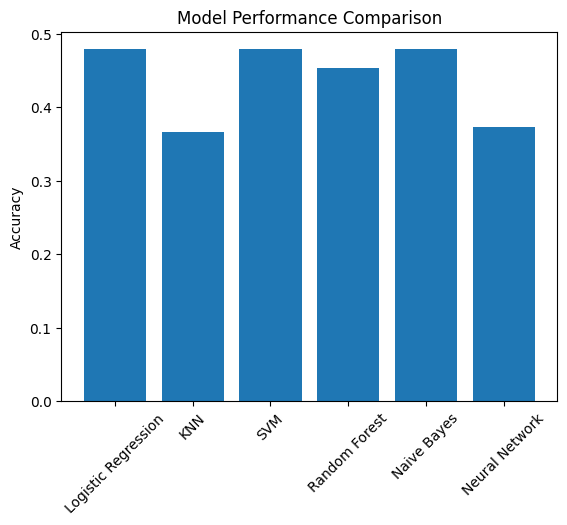

In [7]:
import matplotlib.pyplot as plt

# Plot results
plt.bar(results.keys(), results.values())
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define models and their hyperparameter grids
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

param_grids = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    'KNN': {'n_neighbors': [3, 5, 7], 'metric': ['minkowski', 'euclidean']},
    'Naive Bayes': {},  # No hyperparameters for Naive Bayes
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (100, 100)], 'activation': ['relu', 'tanh']}
}

# Store the best models and results
best_models = {}
results = {}

# Loop over the models
for model_name, model in models.items():
    print(f"Performing GridSearch for {model_name}")
    
    # Define the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit GridSearchCV to the training data
    grid_search.fit(X_train_scaled, y_train)
    
    # Save the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Store results
    results[model_name] = grid_search.best_score_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")
    print('-' * 50)

# Compare models based on results
for model_name, accuracy in results.items():
    print(f"{model_name}: Best Accuracy = {accuracy:.4f}")


Performing GridSearch for Random Forest
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.49874999999999997
--------------------------------------------------
Performing GridSearch for SVM
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.49924999999999997
--------------------------------------------------
Performing GridSearch for Logistic Regression
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.49924999999999997
--------------------------------------------------
Performing GridSearch for KNN
Best parameters for KNN: {'metric': 'minkowski', 'n_neighbors': 7}
Best Cross-Validation Accuracy: 0.41925
--------------------------------------------------
Performing GridSearch for Naive Bayes
Best parameters for Naive Bayes: {}
Best Cross-Validation Accuracy: 0.49924999999999997
------------------------------------

In [10]:
# Test the best models
for model_name, model in best_models.items():
    print(f"Testing {model_name} on the Test Set")
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print('-' * 50)


Testing Random Forest on the Test Set
Random Forest Test Accuracy: 0.4800
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       269
           1       0.48      1.00      0.65       479
           2       0.00      0.00      0.00       252

    accuracy                           0.48      1000
   macro avg       0.49      0.33      0.22      1000
weighted avg       0.50      0.48      0.31      1000

--------------------------------------------------
Testing SVM on the Test Set
SVM Test Accuracy: 0.4790
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.48      1.00      0.65       479
           2       0.00      0.00      0.00       252

    accuracy                           0.48      1000
   macro avg       0.16      0.33      0.22      1000
weighted avg       0.23      0.48      0.31      1000

--------------------------------------------------
Testing 

C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

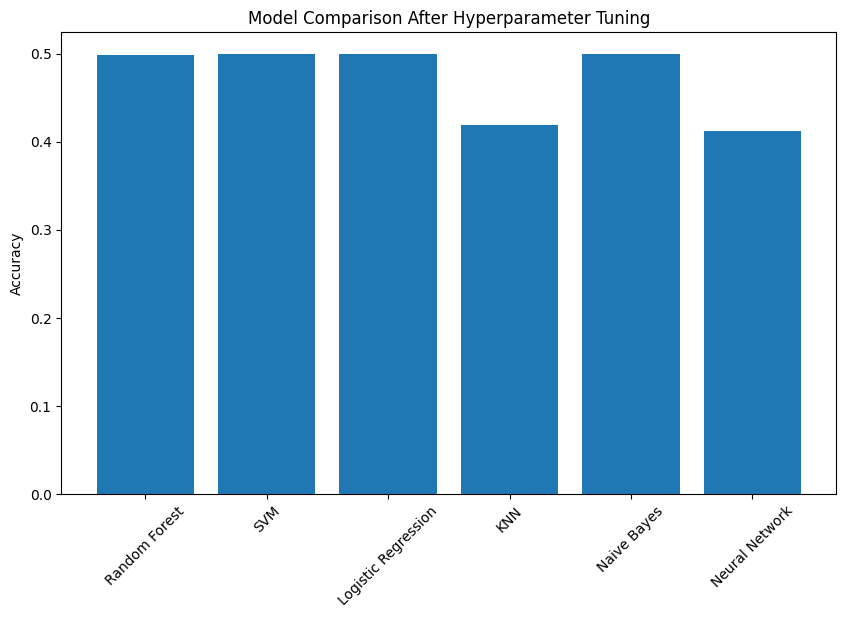

In [11]:
import matplotlib.pyplot as plt

# Plot model comparison based on best accuracy
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison After Hyperparameter Tuning")
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score

# Compare models based on cross-validation scores
cv_scores = {}

for model_name, model in best_models.items():
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_scores[model_name] = cv_score
    print(f"{model_name}: CV Score = {cv_score:.4f}")

# Select model with the highest CV score
best_cv_model_name = max(cv_scores, key=cv_scores.get)
best_cv_model = best_models[best_cv_model_name]
print(f"Best Model based on Cross-Validation: {best_cv_model_name}")


Random Forest: CV Score = 0.4973
SVM: CV Score = 0.4992
Logistic Regression: CV Score = 0.4992
KNN: CV Score = 0.4193
Naive Bayes: CV Score = 0.4992
Neural Network: CV Score = 0.3923
Best Model based on Cross-Validation: SVM


C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
import pickle

# Find the first best model based on accuracy
best_cv_model_name = max(results, key=results.get)  # Get the model name with highest accuracy
best_model = best_models[best_cv_model_name]  # Get the model object

# Save the best model to a .pkl file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Confirm saving
print(f"Best model ({best_cv_model_name}) saved as 'best_model.pkl'")


Best model (SVM) saved as 'best_model.pkl'
